In [1]:
%matplotlib inline

import csv
import pathlib
import numpy as np
from datetime import date
import matplotlib as mpl
import matplotlib.pyplot as plt
from cycler import cycler
import seaborn as sns

from functions import get_rki_data, get_ecdc_data, get_jhu_data_time_series,\
                      get_un_population_numbers, get_de_population_numbers, get_us_population_numbers,\
                      get_jhu_data_status_report, plot, aggregate_entity_data

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [68]:
# sets plotting style and line styles/colors
plt.style.use('seaborn')
mpl.rcParams['axes.prop_cycle'] = cycler(linestyle=['-', '--', ':']) \
                                  * cycler('color', ['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974', '#64B5CD'])
fig_dir = '/home/lennart/FAUbox/covid-19_graphs/' 

# Sources

## COVID-19 data
1. Daily source for world-wide COVID-19 case numbers:
    https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide
2. Data sets for German states and counties:
    https://npgeo-corona-npgeo-de.hub.arcgis.com/search?collection=Dataset
    https://npgeo-corona-npgeo-de.hub.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0
3. JHU data repository:
    https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series
3. Our world in data:
    https://ourworldindata.org/coronavirus

## Population numbers
1. UN population data:
    https://data.un.org/_Docs/SYB/CSV/SYB62_1_201907_Population,%20Surface%20Area%20and%20Density.csv
2. Population numbers of German states:
    https://www-genesis.destatis.de/genesis//online?operation=table&code=12411-0021
3. Population numbers of US states
    https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/national/totals/nst-est2019-alldata.csv

# Load COVID-19 and population data

In [17]:
ecdc_date = date(2020, 3, 25)
rki_date = date(2020, 3, 24)
jhu_date = date(2020, 3, 24)

ecdc_src = "https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide"
rki_src = "https://npgeo-corona-npgeo-de.hub.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0"
jhu_time_series_src = "https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series"
jhu_daily_src = "https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports"

un_pop_num_src = "https://data.un.org/_Docs/SYB/CSV/SYB62_1_201907_Population,%20Surface%20Area%20and%20Density.csv"
de_pop_num_src = "https://www-genesis.destatis.de/genesis//online?operation=table&code=12411-0021"
us_pop_num_src = " https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/national/totals/nst-est2019-alldata.csv"


rki_states, rki_counties, rki_cbs = get_rki_data('/home/lennart/Downloads/RKI_COVID19.csv')
ecdc_countries, ecdc_country_dic = get_ecdc_data('/home/lennart/Downloads/COVID-19-geographic-disbtribution-worldwide-{}_0.csv'.format(ecdc_date))
#jhu_countries, jhu_states, jhu_sbc = get_jhu_data('/home/lennart/Downloads/time_series_19-covid-Confirmed.csv',
#                                                  '/home/lennart/Downloads/time_series_19-covid-Deaths.csv')
jhu_countries, jhu_states, jhu_counties, jhu_sbc, jhu_cbs = get_jhu_data_status_report('/home/lennart/src/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports')

un_pop_nums = get_un_population_numbers('/home/lennart/Downloads/SYB62_1_201907_Population, Surface Area and Density.csv', 2019, ecdc_country_dic)
de_pop_nums = get_de_population_numbers('/home/lennart/Downloads/12411-0021_.csv')
us_pop_nums = get_us_population_numbers('/home/lennart/Downloads/nst-est2019-alldata.csv')

# Plot
## Worldwide

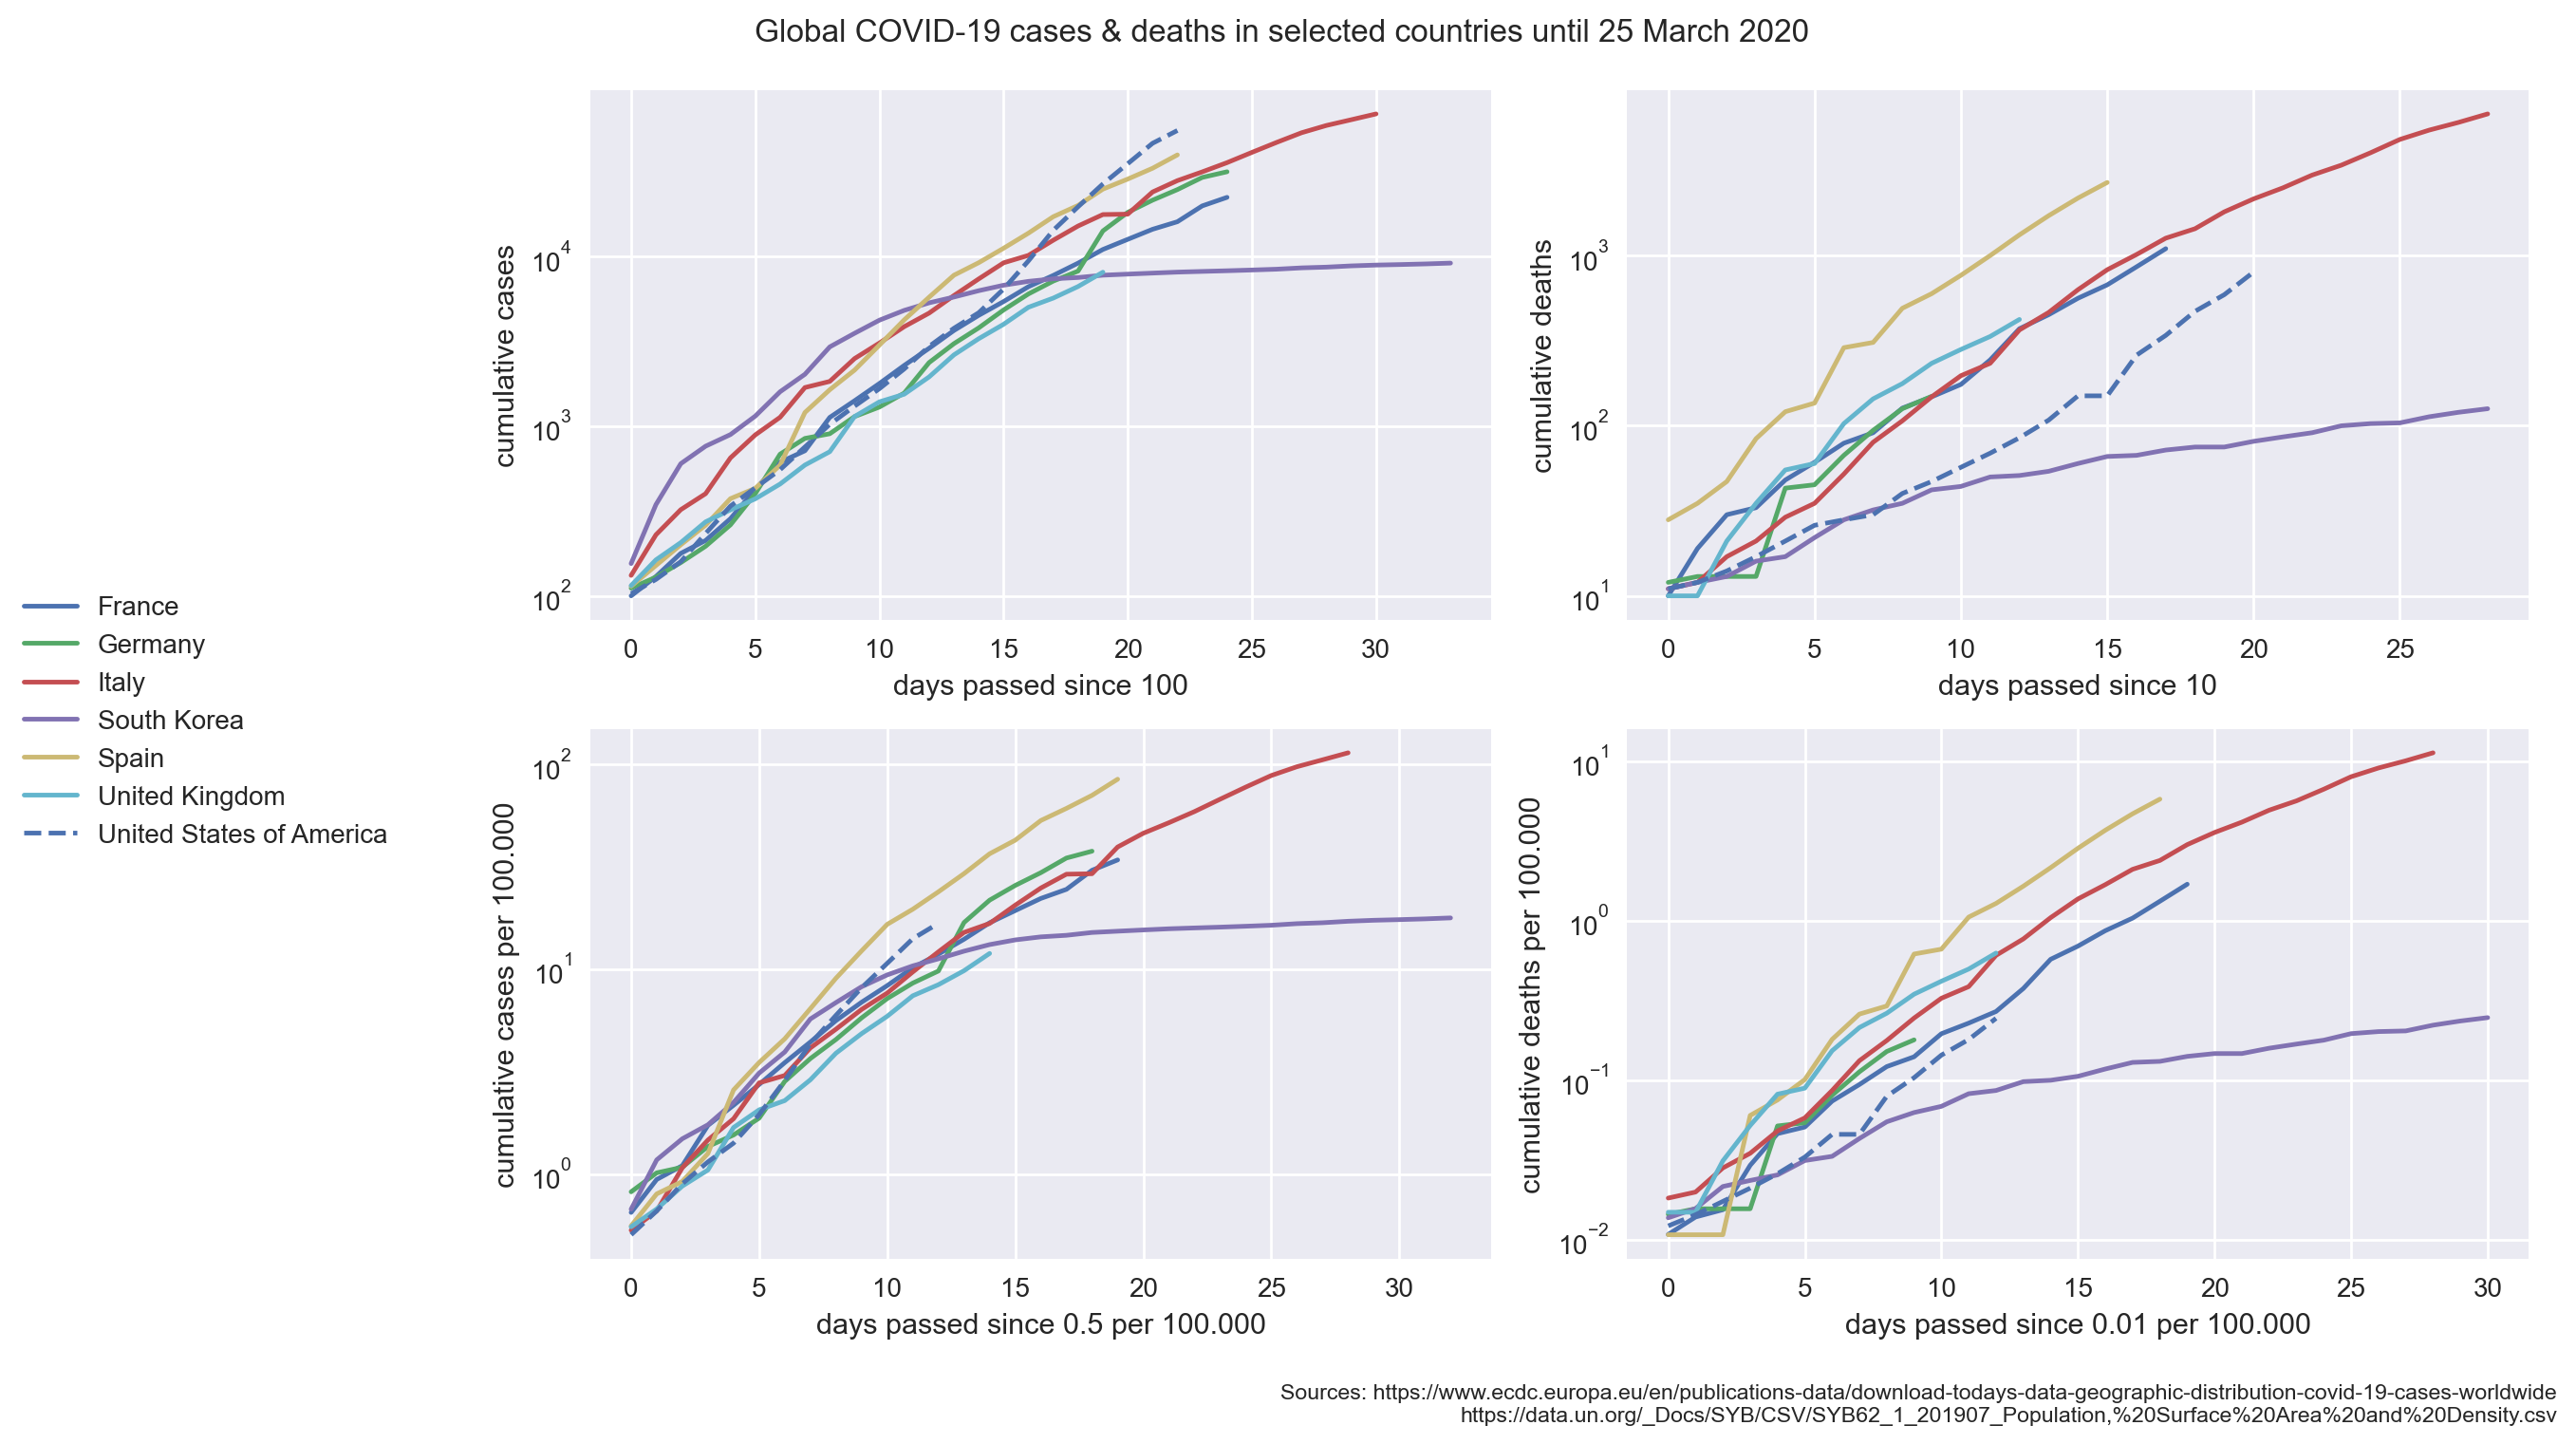

In [69]:
c_list = sorted(['IT', 'DE', 'FR', 'ES', 'US', 'UK', 'KR'], key=lambda x: ecdc_country_dic[x])
fig, ax = plt.subplots(2, 2, **{'figsize': (0.7 * 19.2 , 0.7 * 10.8), 'dpi': 200})
plot(c_list, 'days_passed', 'cum_cases', data=ecdc_countries, norm=False, align=100, ax=ax[0, 0], legend=False, label_dic=ecdc_country_dic)
plot(c_list, 'days_passed', 'cum_cases', data=ecdc_countries, norm=True, align=0.5, ax=ax[1, 0], legend=False, label_dic=ecdc_country_dic, pop_nums=un_pop_nums)
plot(c_list, 'days_passed', 'cum_deaths', data=ecdc_countries, norm=False, align=10, ax=ax[0, 1], legend=False, label_dic=ecdc_country_dic, pop_nums=un_pop_nums)
plot(c_list, 'days_passed', 'cum_deaths', data=ecdc_countries, norm=True, align=0.01, ax=ax[1, 1], legend=False, label_dic=ecdc_country_dic, pop_nums=un_pop_nums)

# fig.autofmt_xdate()

fig.suptitle("Global COVID-19 cases & deaths in selected countries until {}".format(ecdc_date.strftime('%d %B %Y')))
handles, labels = ax[1, 1].get_legend_handles_labels()
fig.legend(handles, labels, loc='center left')
fig.text(1, 0, "Sources: " + ecdc_src + '\n' + un_pop_num_src,
         horizontalalignment='right', verticalalignment='bottom', fontsize='small')

fig.tight_layout(rect=(0.18, 0.04, 1.0, 0.95))
fig.savefig(fig_dir + 'worldwide_{}.png'.format(ecdc_date))

## US states

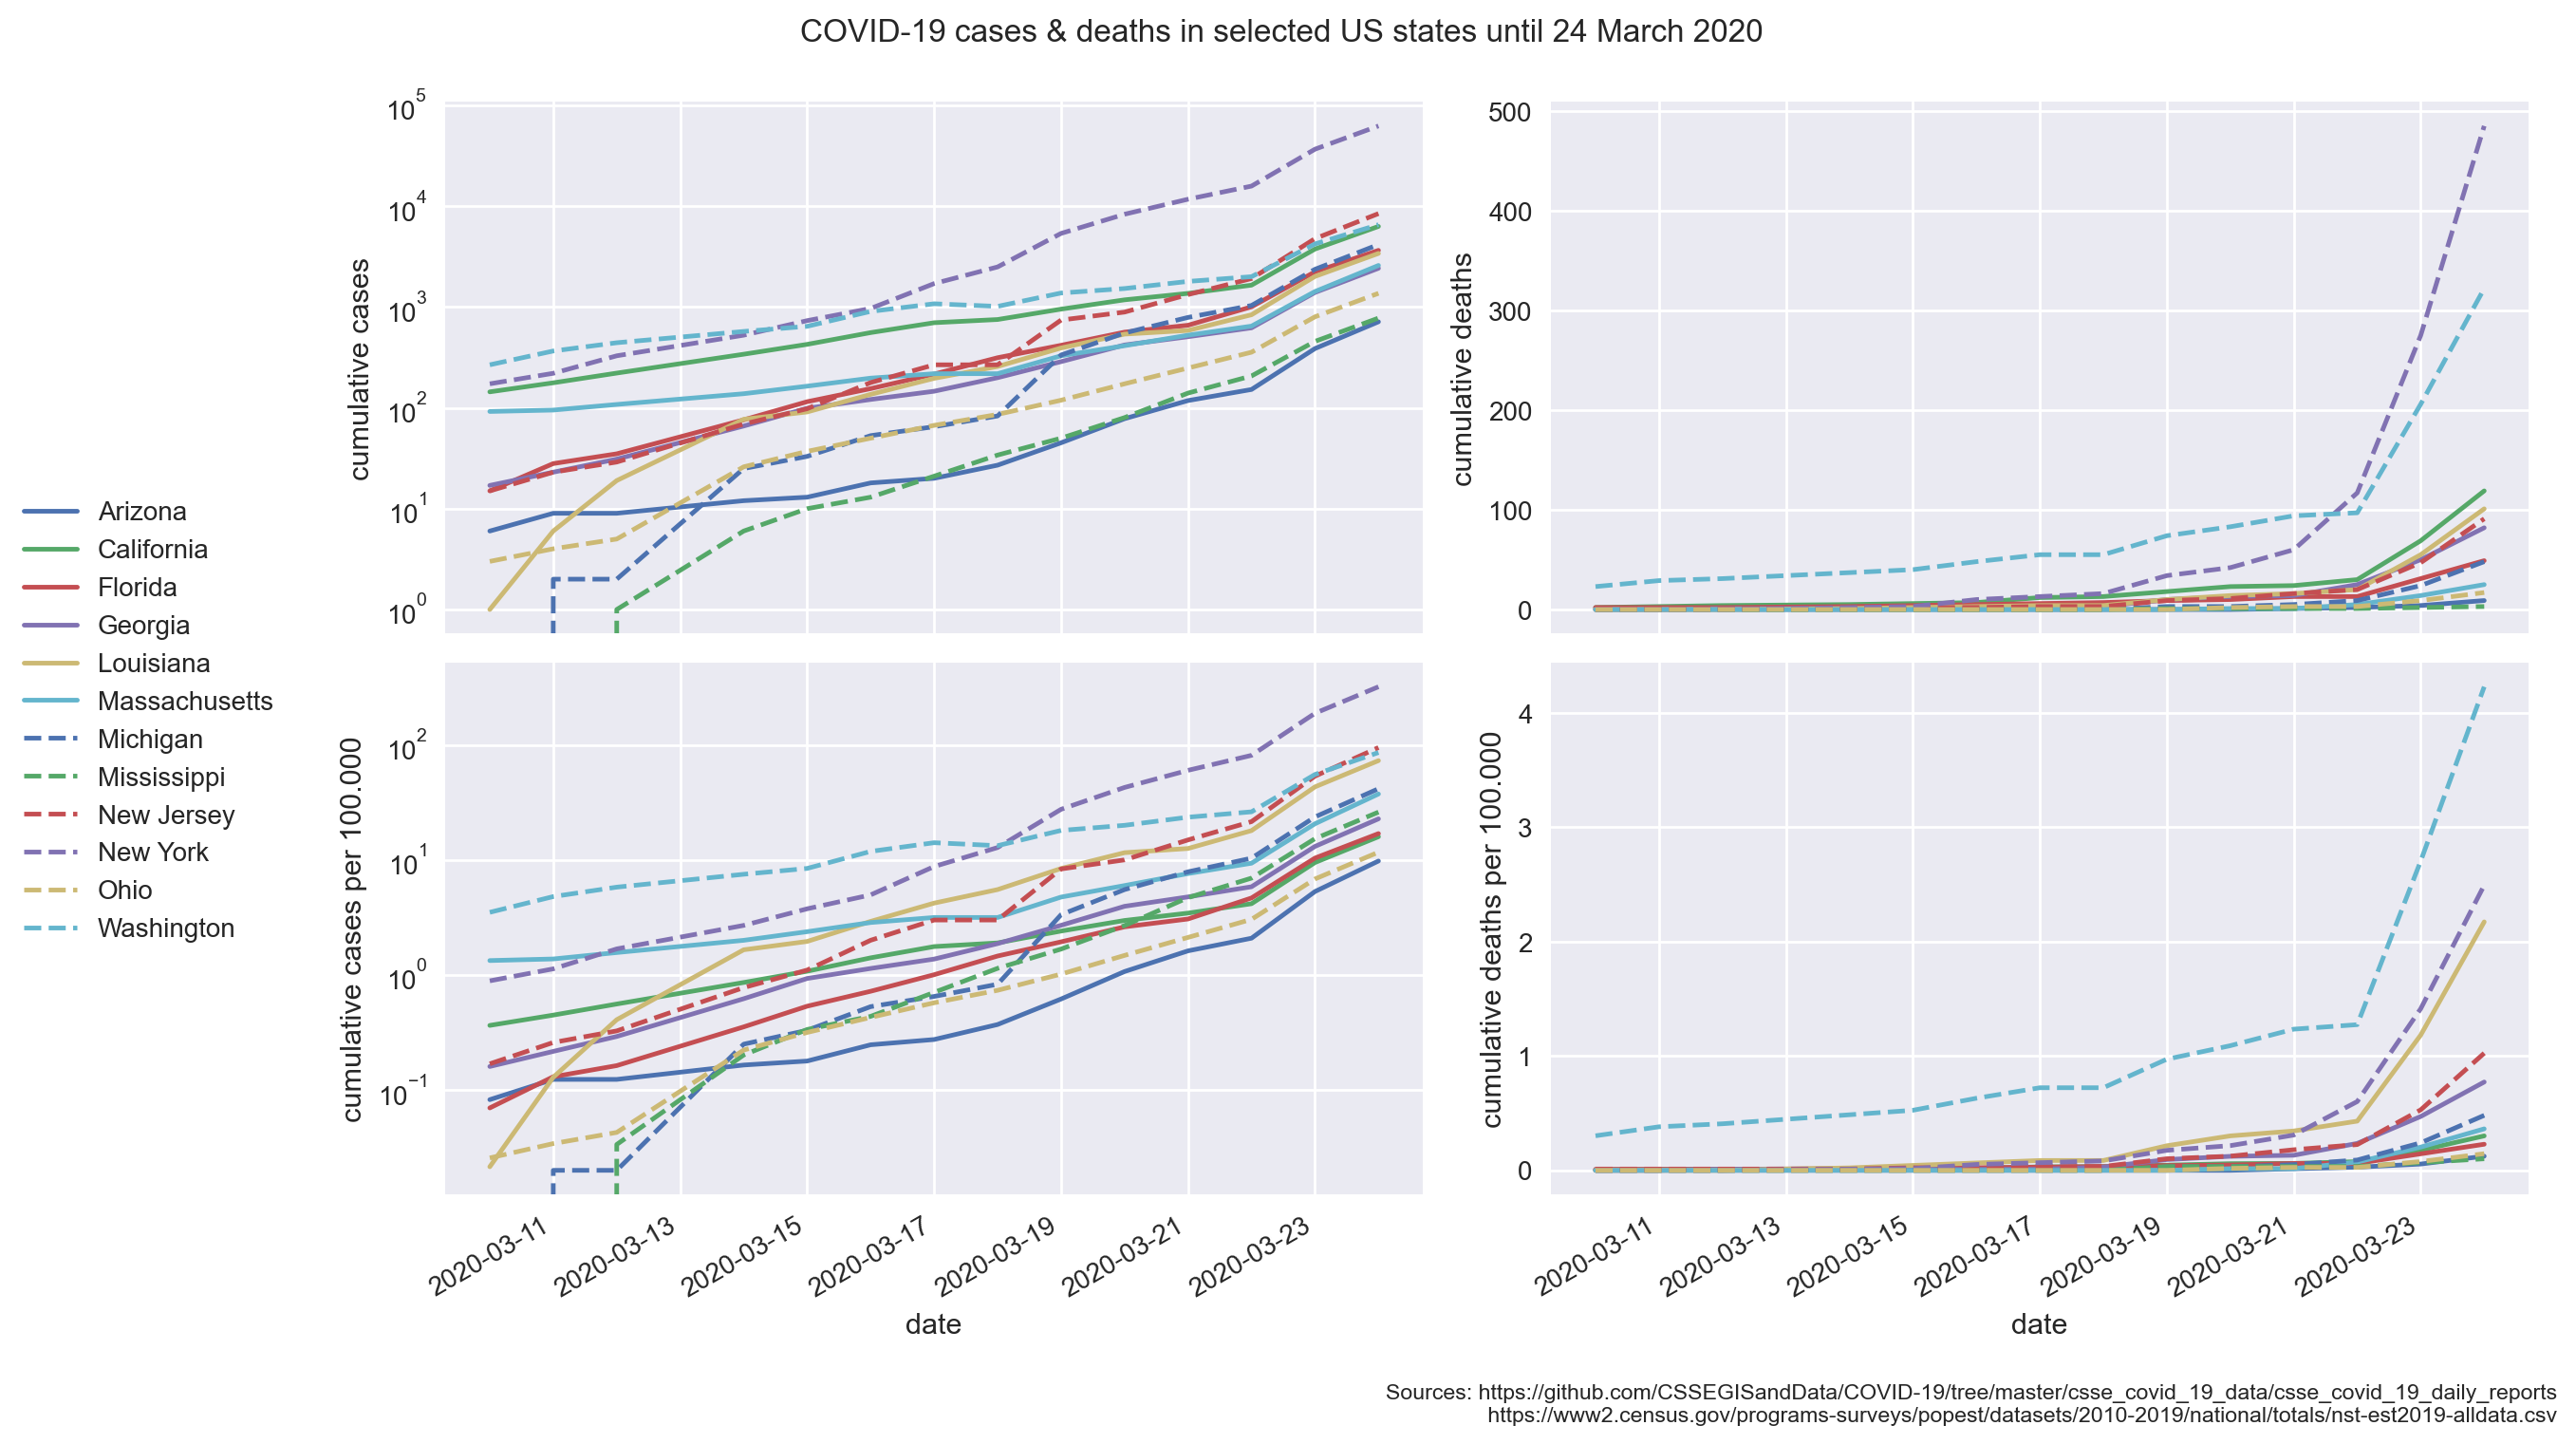

In [82]:
e_list = sorted(['Massachusetts', 'California', 'Washington', 'Florida', 'New York', 'New Jersey', 'Louisiana', 'Georgia', 'Mississippi', 'Michigan', 'Arizona', 'Ohio'])
fig, ax = plt.subplots(2, 2, **{'figsize': (0.7 * 19.2 , 0.7 * 10.8), 'dpi': 200})
x_start = date(2020, 2, 24)
plot(e_list, 'date', 'cum_cases', data=jhu_states, norm=False, ax=ax[0, 0], x_start=x_start, legend=False)
plot(e_list, 'date', 'cum_cases', data=jhu_states, norm=True, ax=ax[1, 0], x_start=x_start, legend=False, pop_nums=us_pop_nums)
plot(e_list, 'date', 'cum_deaths', data=jhu_states, norm=False, ax=ax[0, 1], y_scale='linear', x_start=x_start, legend=False)
plot(e_list, 'date', 'cum_deaths', data=jhu_states, norm=True, ax=ax[1, 1], y_scale='linear', x_start=x_start, legend=False, pop_nums=us_pop_nums)
fig.autofmt_xdate()

fig.suptitle("COVID-19 cases & deaths in selected US states until {}".format(jhu_date.strftime('%d %B %Y')))
handles, labels = ax[1, 1].get_legend_handles_labels()
fig.legend(handles, labels, loc='center left')
fig.text(1, 0, "Sources: " + jhu_daily_src + '\n' + us_pop_num_src,
         horizontalalignment='right', verticalalignment='bottom', fontsize='small')

fig.tight_layout(rect=(0.12, 0.04, 1.0, 0.95))
fig.savefig(fig_dir + 'selected_us_states_{}.png'.format(jhu_date))

## Some US states vs Spain & Italy

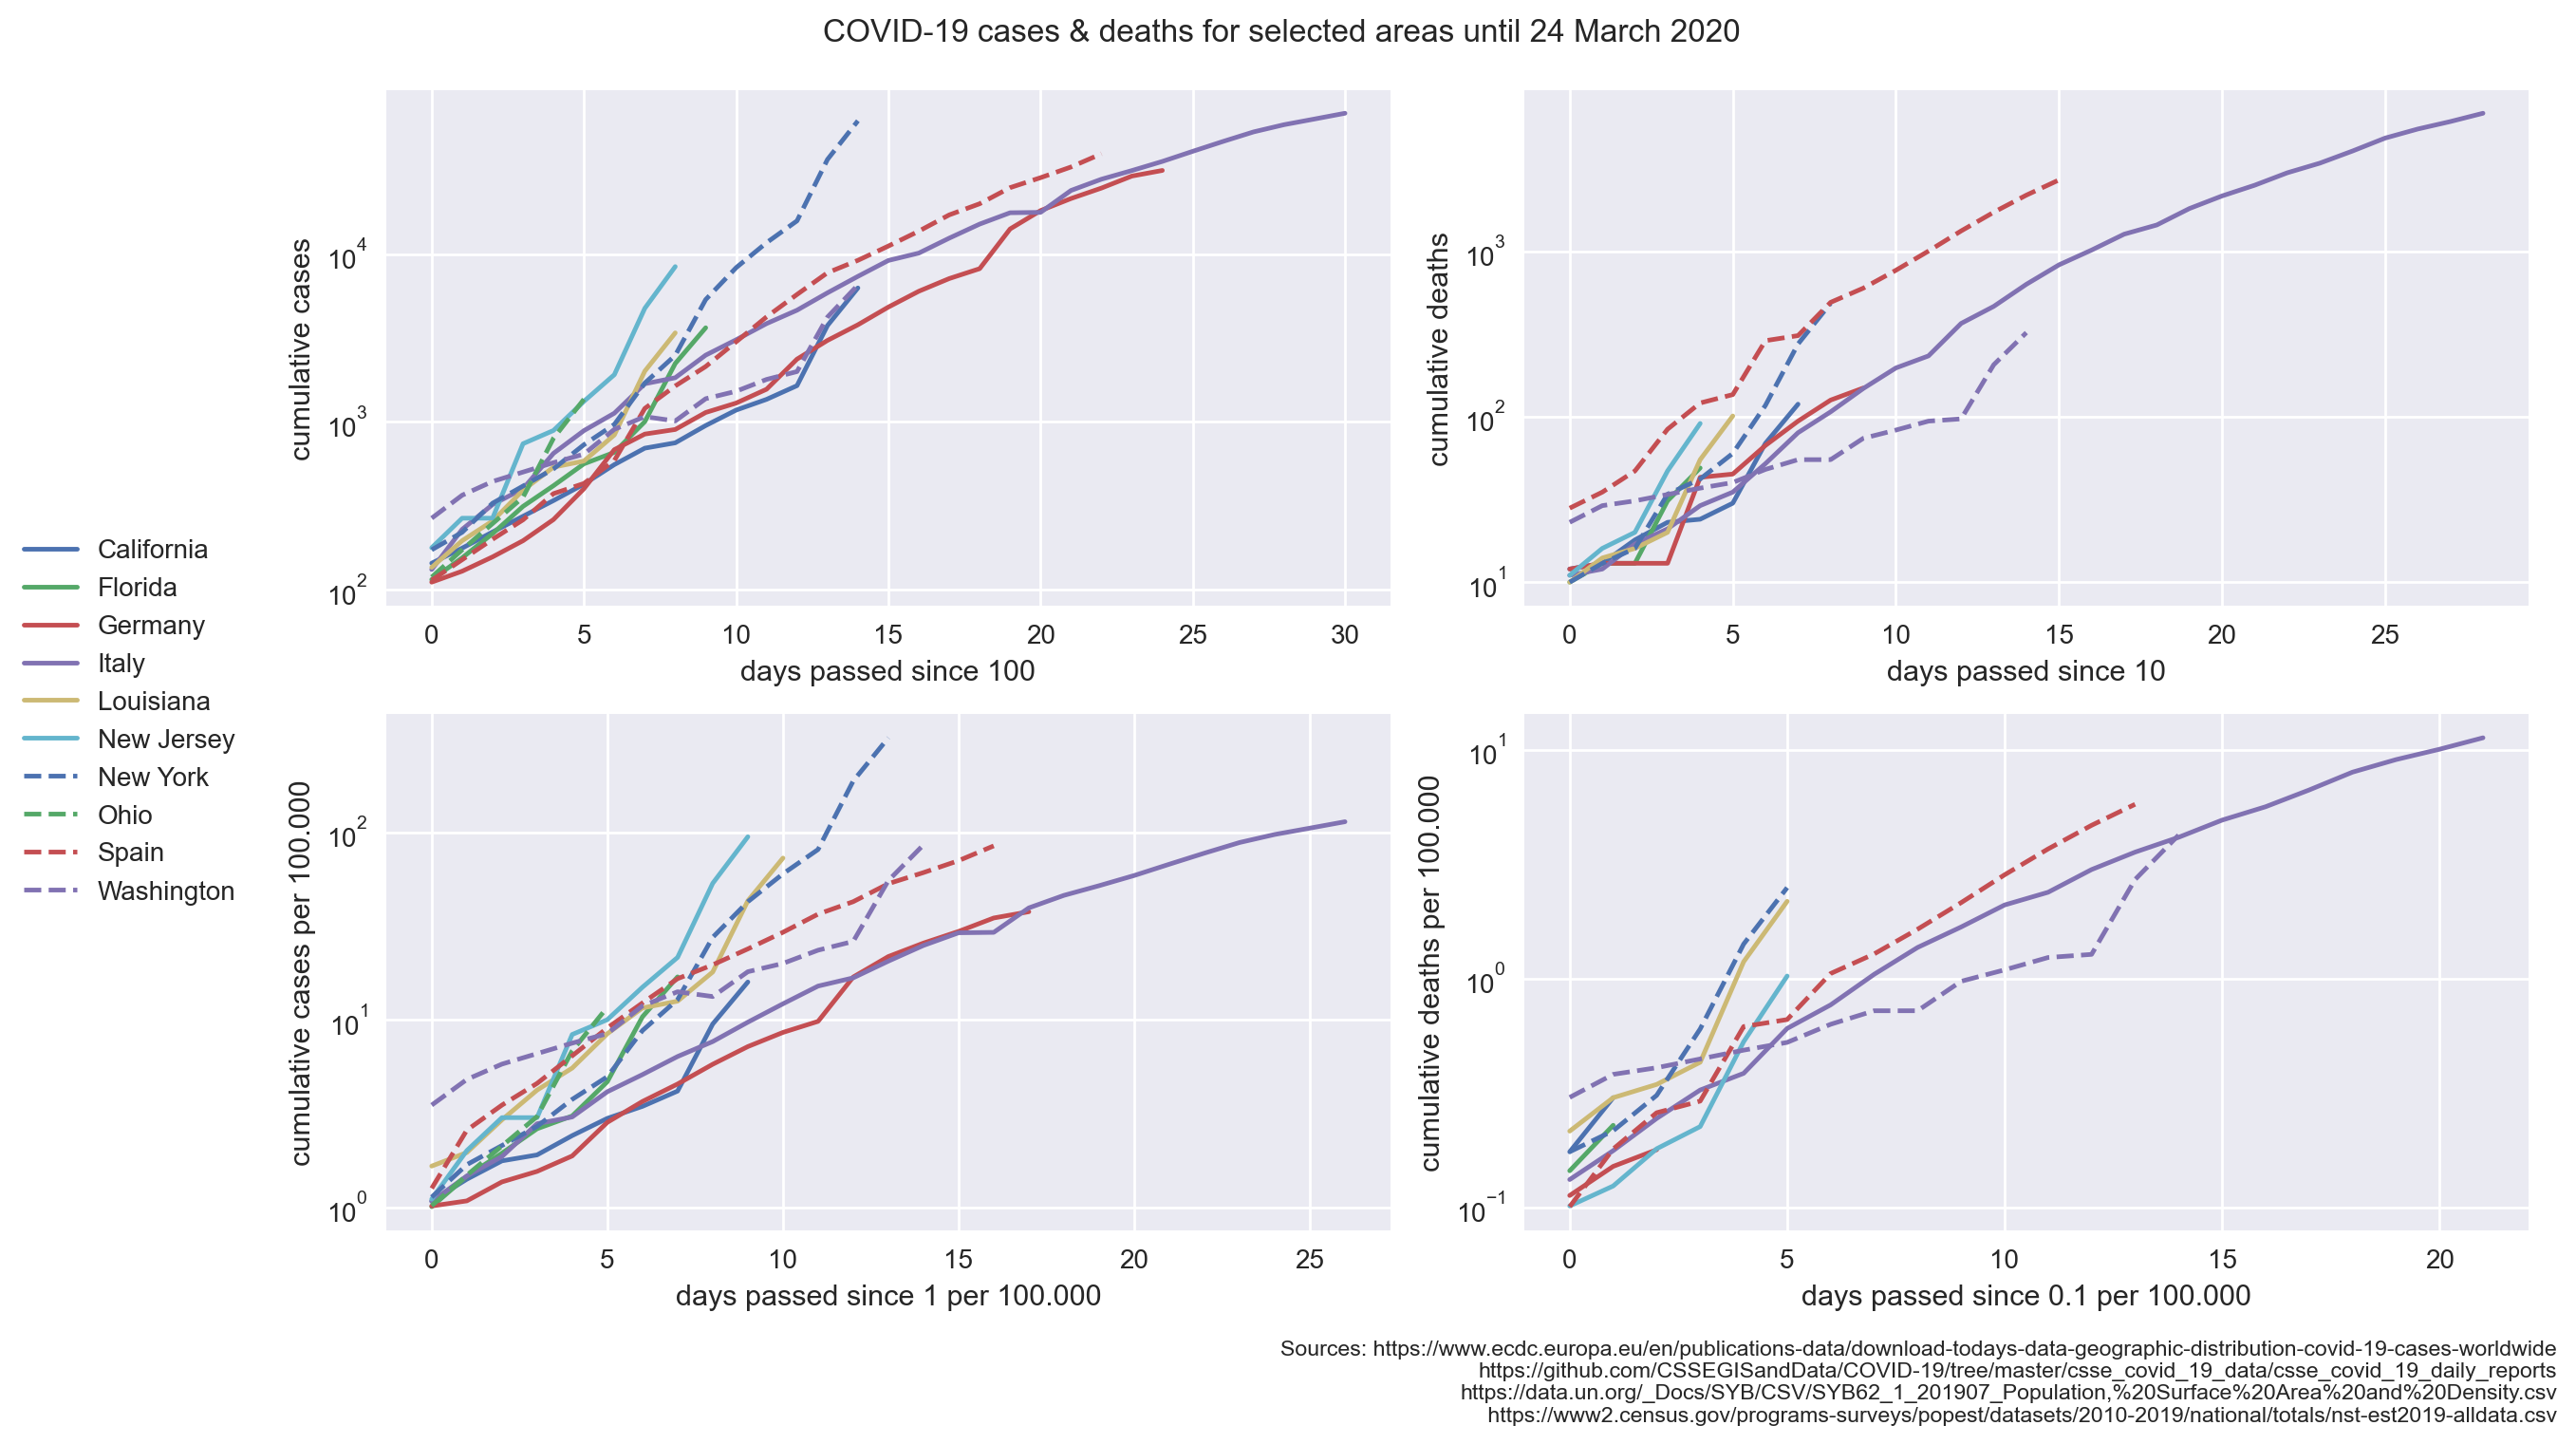

In [87]:
e_list = ['IT', 'ES', 'New York', 'New Jersey', 'California', 'Washington', 'DE', 'Louisiana', 'Florida', 'Ohio']
data_sets = [(ecdc_countries, un_pop_nums), (jhu_states, us_pop_nums)]
m_dic = {}
m_pn = {}
m_label_dic = {}

for ds, pop in data_sets:
    for e, v in ds.items():
        if e in e_list:
            m_dic[e] = v
            m_pn[e] = pop[e]
            
for k, v in ecdc_country_dic.items():
    m_label_dic[k] = v
for e in jhu_states:
    m_label_dic[e] = e
    
e_list = sorted(e_list, key=lambda x: m_label_dic[x])


#e_list = sorted(rki_states.keys())
fig, ax = plt.subplots(2, 2, **{'figsize': (0.7 * 19.2 , 0.7 * 10.8), 'dpi': 200})

plot(e_list, 'days_passed', 'cum_cases', m_dic, norm=False, ax=ax[0, 0], legend=False, y_scale='log', align=100, label_dic=m_label_dic) #, x_start=100)
plot(e_list, 'days_passed', 'cum_cases', m_dic, norm=True, ax=ax[1, 0], legend=False, y_scale='log', align=1, label_dic=m_label_dic, pop_nums=m_pn)
plot(e_list, 'days_passed', 'cum_deaths', m_dic, norm=False, ax=ax[0, 1], legend=False, y_scale='log', align=10, label_dic=m_label_dic, pop_nums=m_pn) #, x_start=10)
plot(e_list, 'days_passed', 'cum_deaths', m_dic, norm=True, ax=ax[1, 1], legend=False, y_scale='log', align=0.1, label_dic=m_label_dic, pop_nums=m_pn)

# fig.autofmt_xdate()

fig.suptitle("COVID-19 cases & deaths for selected areas until {}".format(min(ecdc_date, jhu_date).strftime('%d %B %Y')))
handles, labels = ax[1, 1].get_legend_handles_labels()
fig.legend(handles, labels, loc='center left')

fig.tight_layout(rect=(0.1, 0.06, 1.0, 0.95))
fig.text(1, 0, "Sources: " + ecdc_src + '\n' + jhu_daily_src + '\n' + un_pop_num_src + '\n' + us_pop_num_src,
         horizontalalignment='right', verticalalignment='bottom', fontsize='small');
fig.savefig(fig_dir + 'us_spain_italy_{}.png'.format(min(ecdc_date, jhu_date)))

## Some plots for Germany

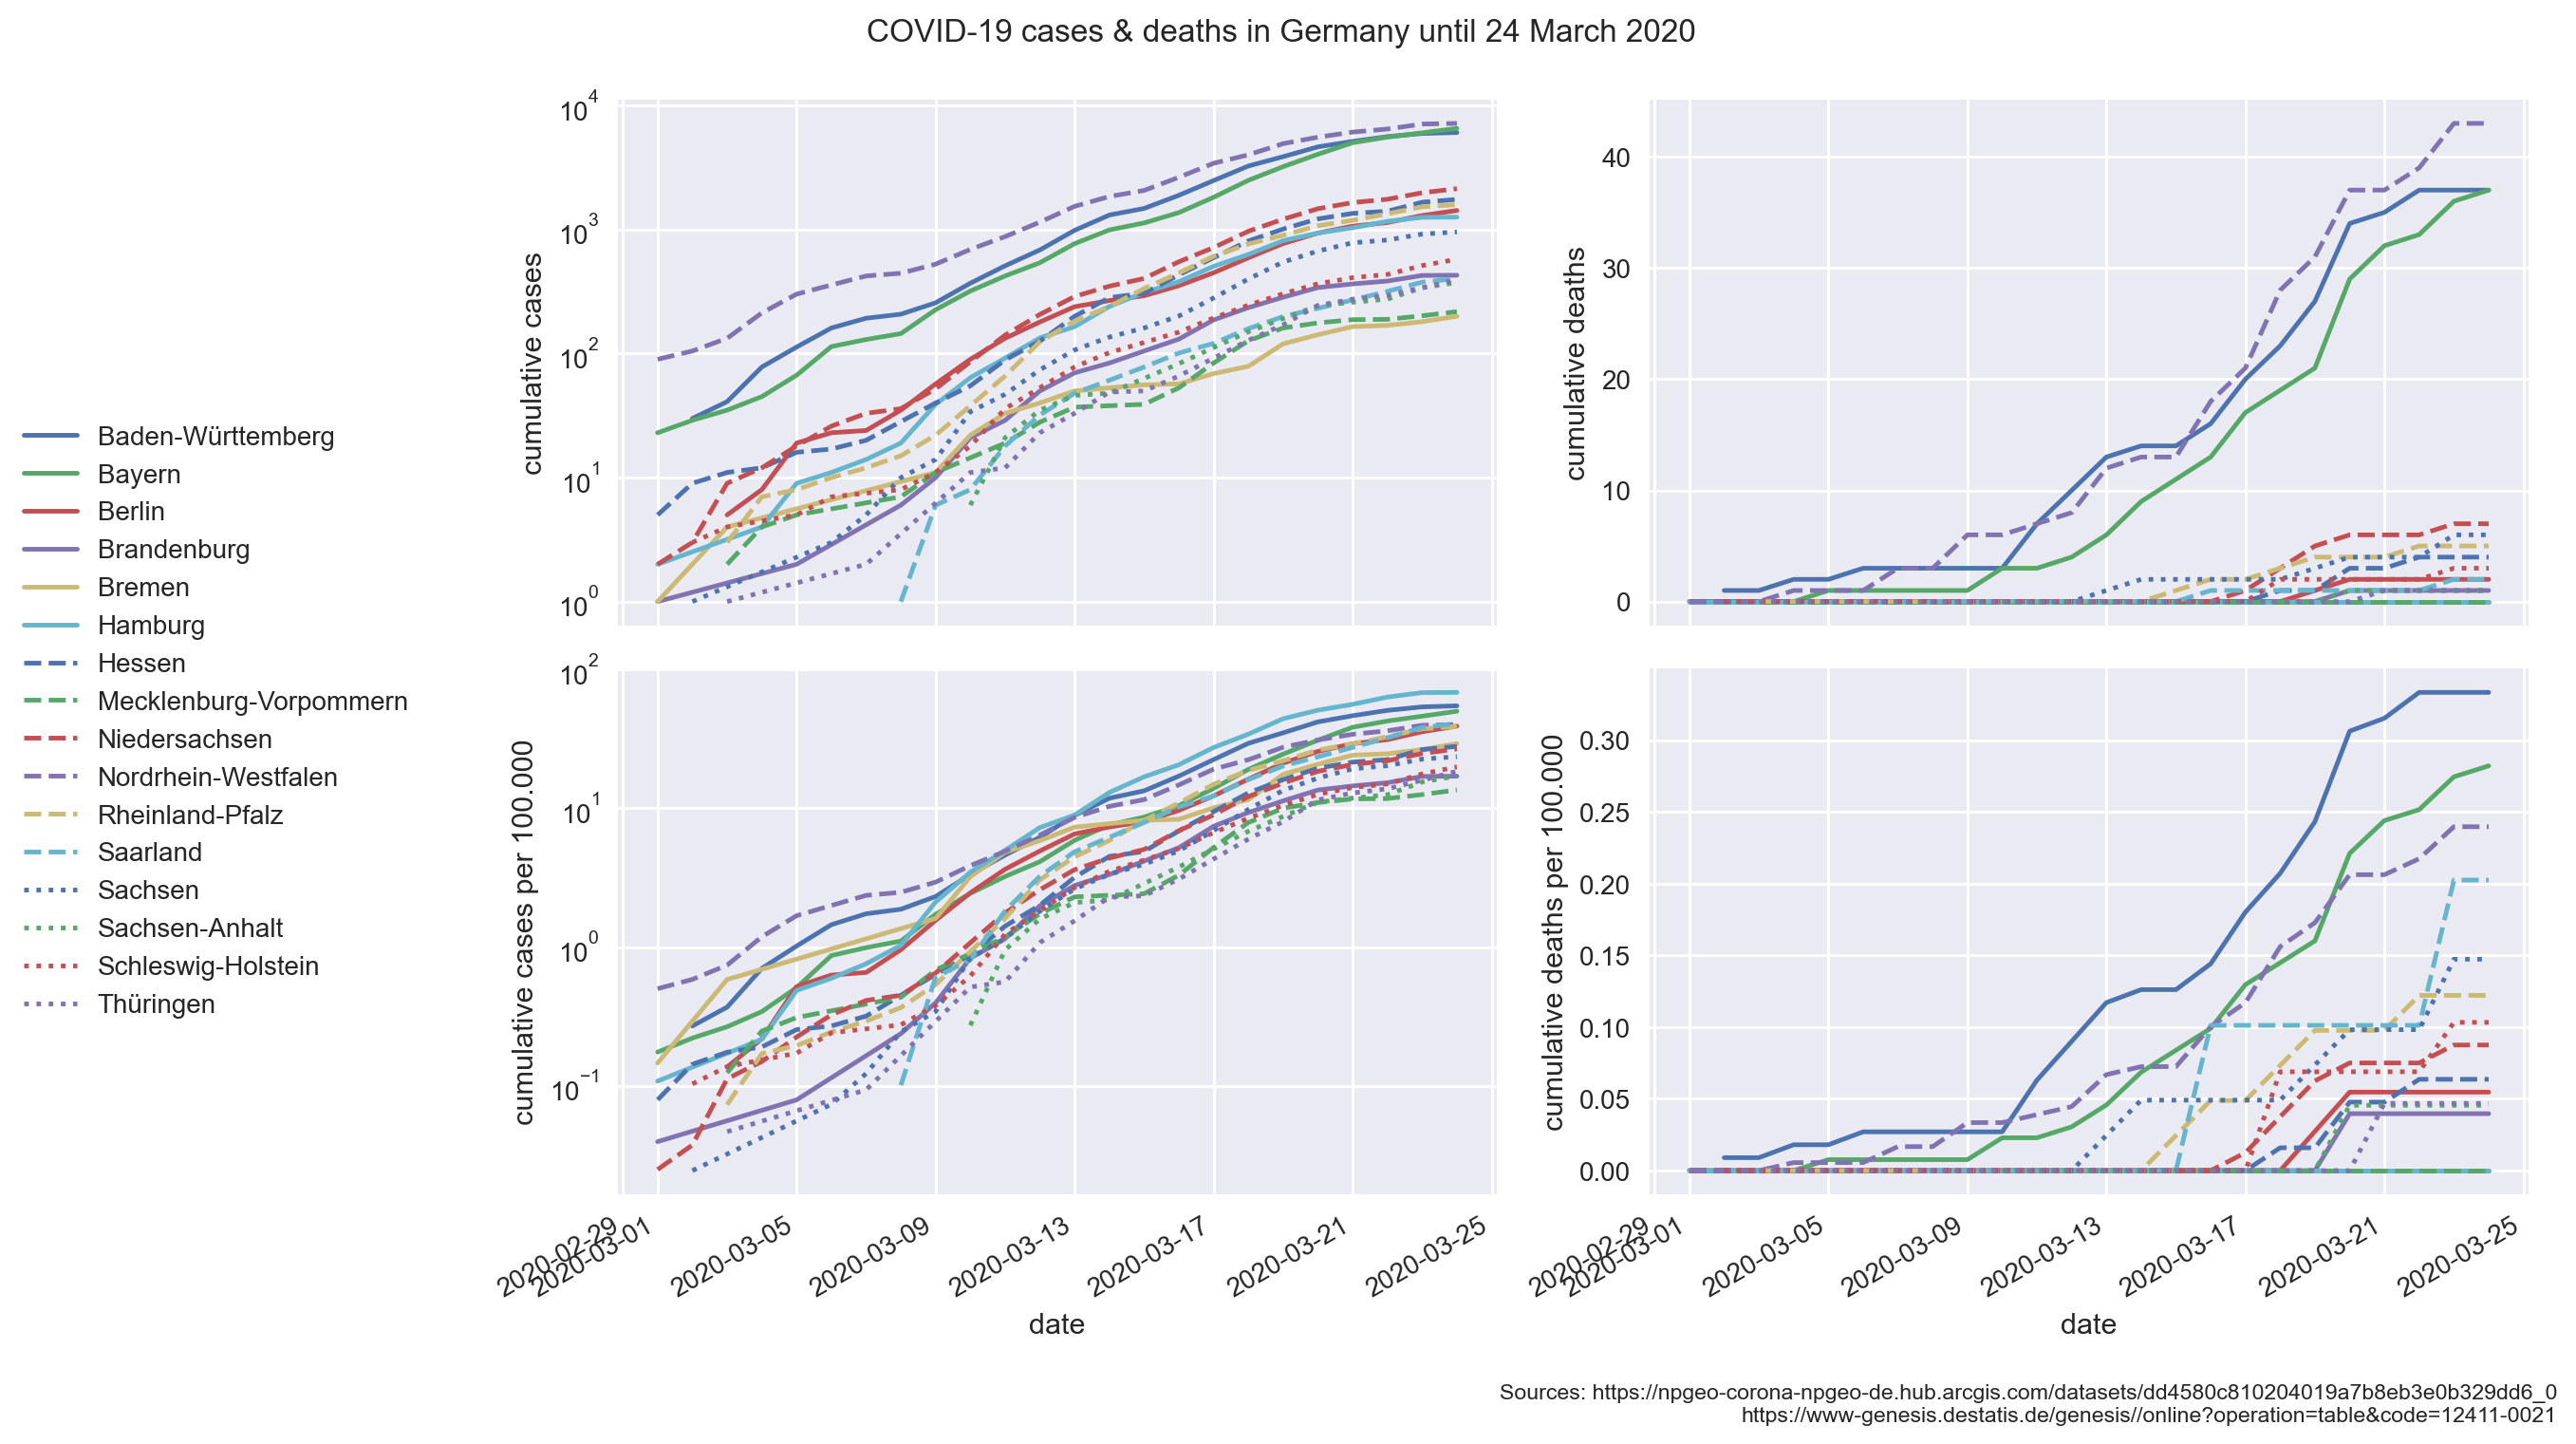

In [72]:
e_list = sorted(rki_states.keys())
fig, ax = plt.subplots(2, 2, **{'figsize': (0.7 * 19.2 , 0.7 * 10.8), 'dpi': 200})

plot(e_list, 'date', 'cum_cases', rki_states, norm=False, ax=ax[0, 0], legend=False, y_scale='log', x_start=date(2020, 3, 1))
plot(e_list, 'date', 'cum_cases', rki_states, norm=True, ax=ax[1, 0], legend=False, y_scale='log', x_start=date(2020, 3, 1), pop_nums=de_pop_nums)
plot(e_list, 'date', 'cum_deaths', rki_states, norm=False, ax=ax[0, 1], legend=False, y_scale='linear', x_start=date(2020, 3, 1))
plot(e_list, 'date', 'cum_deaths', rki_states, norm=True, ax=ax[1, 1], legend=False, y_scale='linear', x_start=date(2020, 3, 1), pop_nums=de_pop_nums)

fig.autofmt_xdate()

fig.suptitle("COVID-19 cases & deaths in Germany until {}".format(rki_date.strftime('%d %B %Y')))
handles, labels = ax[1, 1].get_legend_handles_labels()
fig.legend(handles, labels, loc='center left')

fig.tight_layout(rect=(0.18, 0.04, 1.0, 0.95))
fig.text(1, 0, "Sources: " + rki_src+ '\n' + de_pop_num_src,
         horizontalalignment='right', verticalalignment='bottom', fontsize='small');
fig.savefig(fig_dir + 'germany_states_{}.png'.format(rki_date))

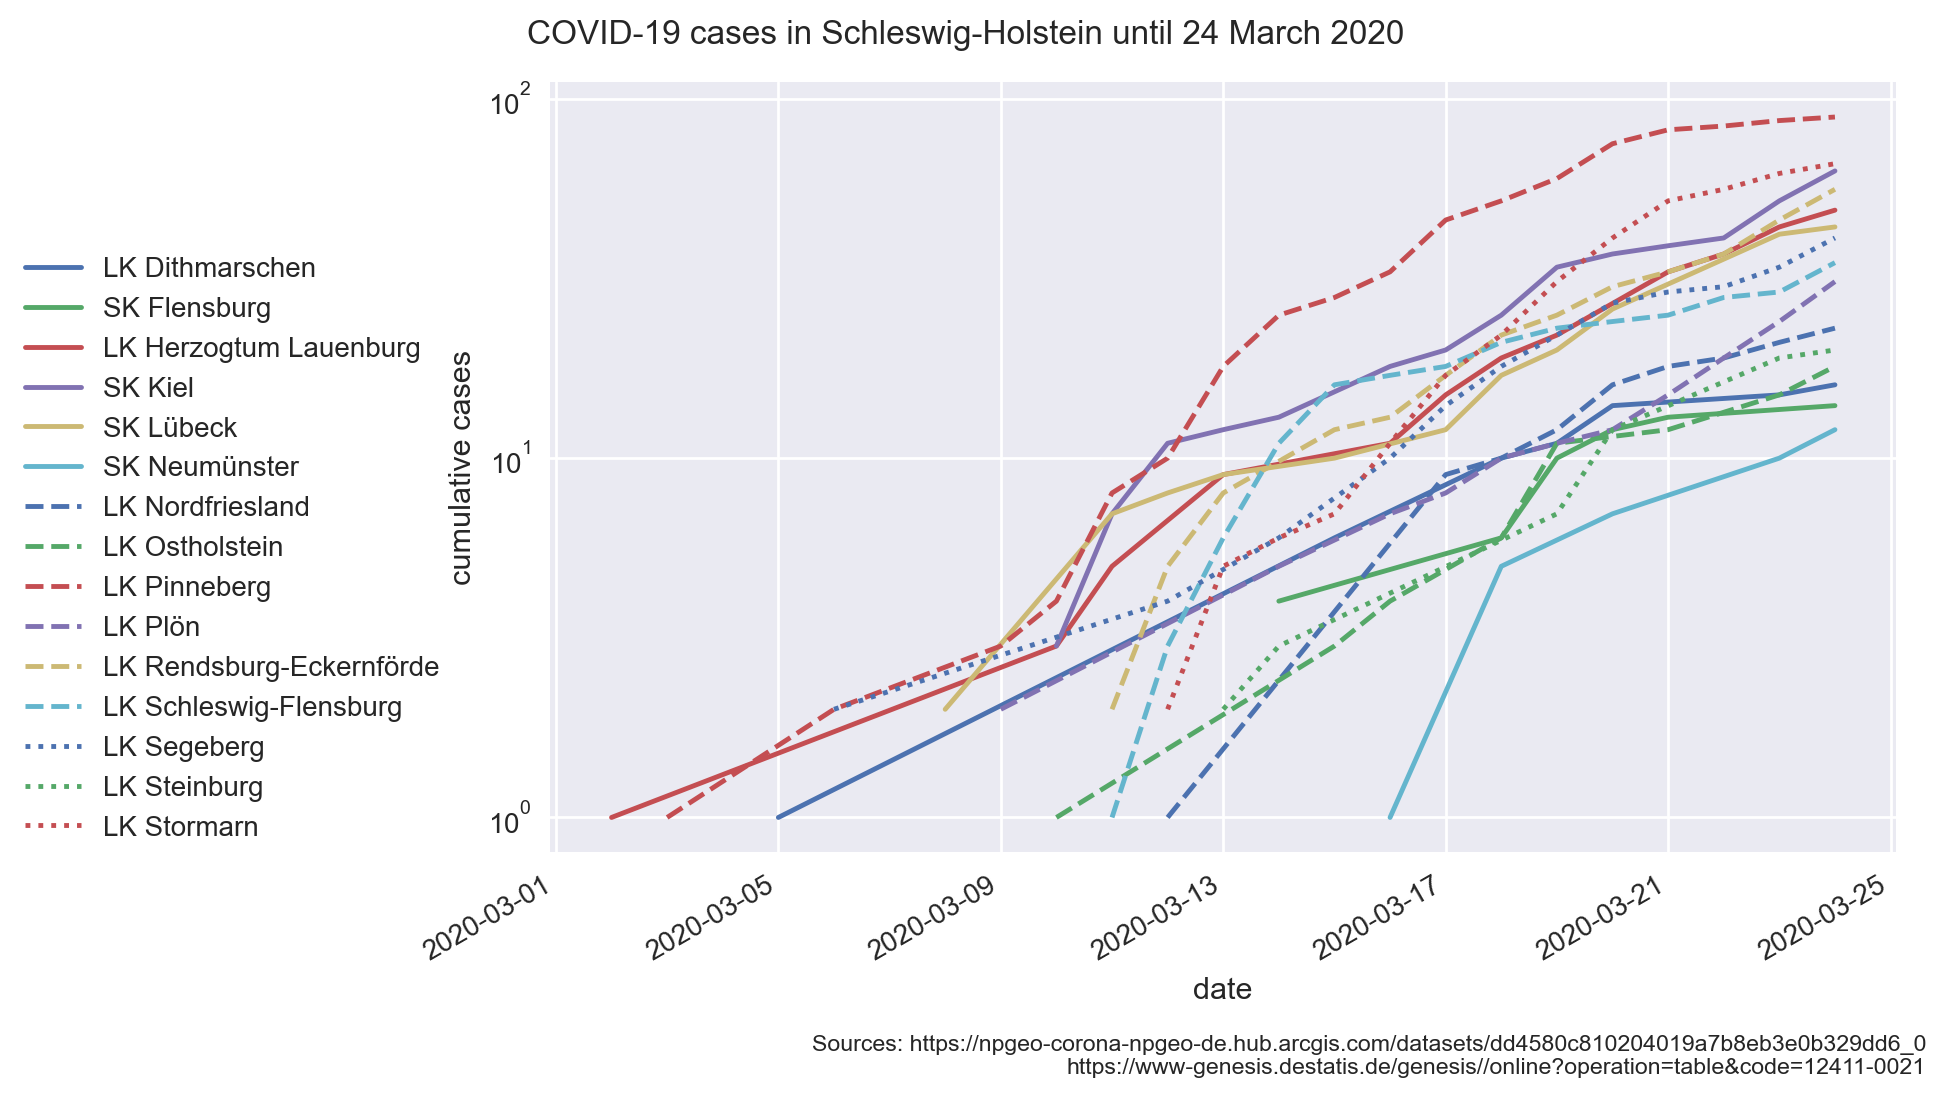

In [73]:
e_list = sorted(rki_cbs['Schleswig-Holstein'], key=lambda e: e.split(' ')[1])
fig, ax = plt.subplots(**{'figsize': (0.5 * 19.2 , 0.5 * 10.8), 'dpi': 200})
plot(e_list, 'date', 'cum_cases', rki_counties, norm=False, ax=ax, legend=False, y_scale='log', x_start=date(2020, 3, 1))
# plot(e_list, 'date', 'cum_deaths', rki_counties, norm=False, ax=ax[1], legend=False, y_scale='linear', x_start=date(2020, 3, 1))
fig.autofmt_xdate()

fig.suptitle("COVID-19 cases in Schleswig-Holstein until {}".format(rki_date.strftime('%d %B %Y')))
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='center left')

fig.tight_layout(rect=(0.2, 0.04, 1.0, 0.95))
fig.text(1, 0, "Sources: " + rki_src+ '\n' + de_pop_num_src,
         horizontalalignment='right', verticalalignment='bottom', fontsize='small');
fig.savefig(fig_dir + 'schleswig-holstein_{}.png'.format(rki_date))

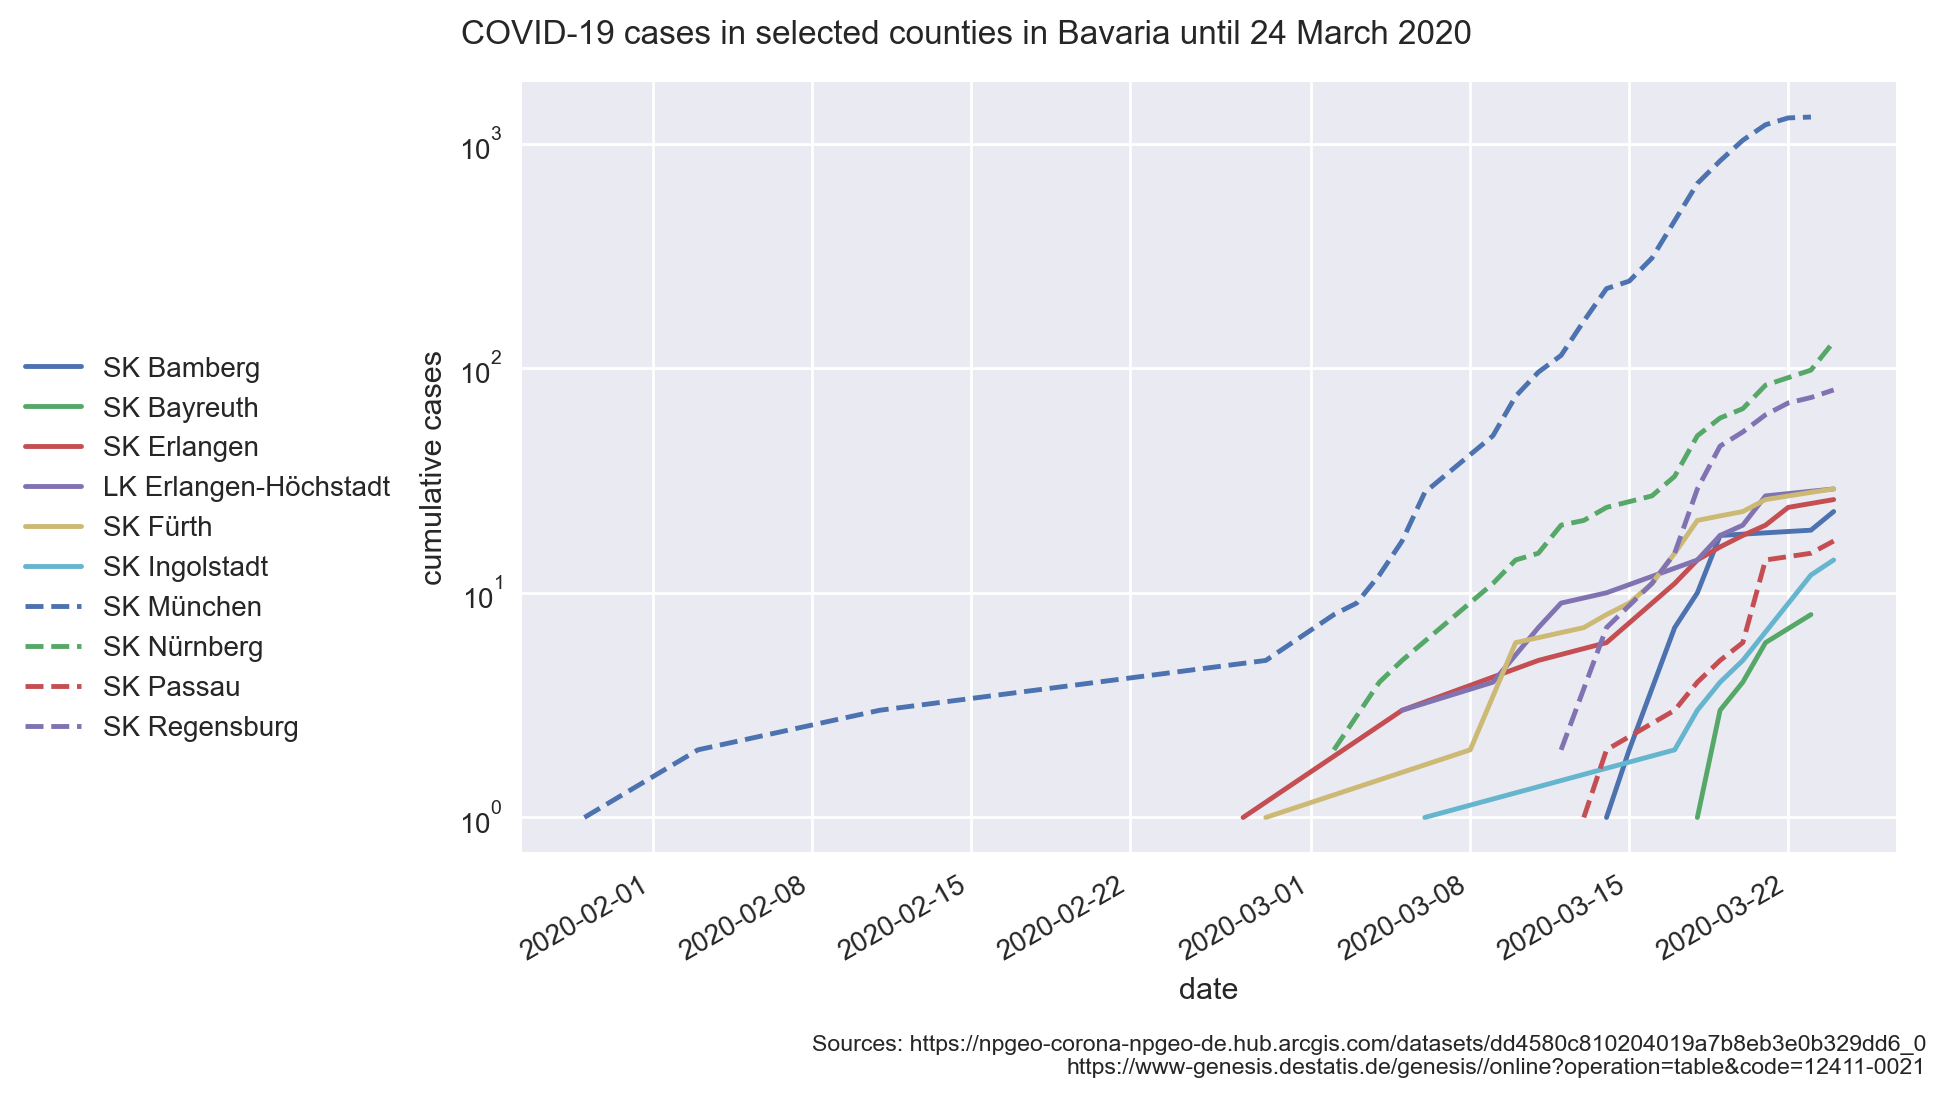

In [74]:
e_list = sorted(['SK Erlangen', 'SK Nürnberg', 'SK München', 'LK Erlangen-Höchstadt', 'SK Fürth', 'SK Ingolstadt', 'SK Bamberg', 'SK Bayreuth', 'SK Passau', 'SK Regensburg'],
                key=lambda e: e.split(' ')[1])
fig, ax = plt.subplots(1, **{'figsize': (0.5 * 19.2 , 0.5 * 10.8), 'dpi': 200})
plot(e_list, 'date', 'cum_cases', rki_counties, norm=False, ax=ax, legend=False)
fig.autofmt_xdate()

fig.suptitle("COVID-19 cases in selected counties in Bavaria until {}".format(rki_date.strftime('%d %B %Y')))
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='center left')

fig.tight_layout(rect=(0.2, 0.04, 1.0, 0.95))
fig.text(1, 0, "Sources: " + rki_src + '\n' + de_pop_num_src,
         horizontalalignment='right', verticalalignment='bottom', fontsize='small');
fig.savefig(fig_dir + 'bavaria_{}.png'.format(rki_date))

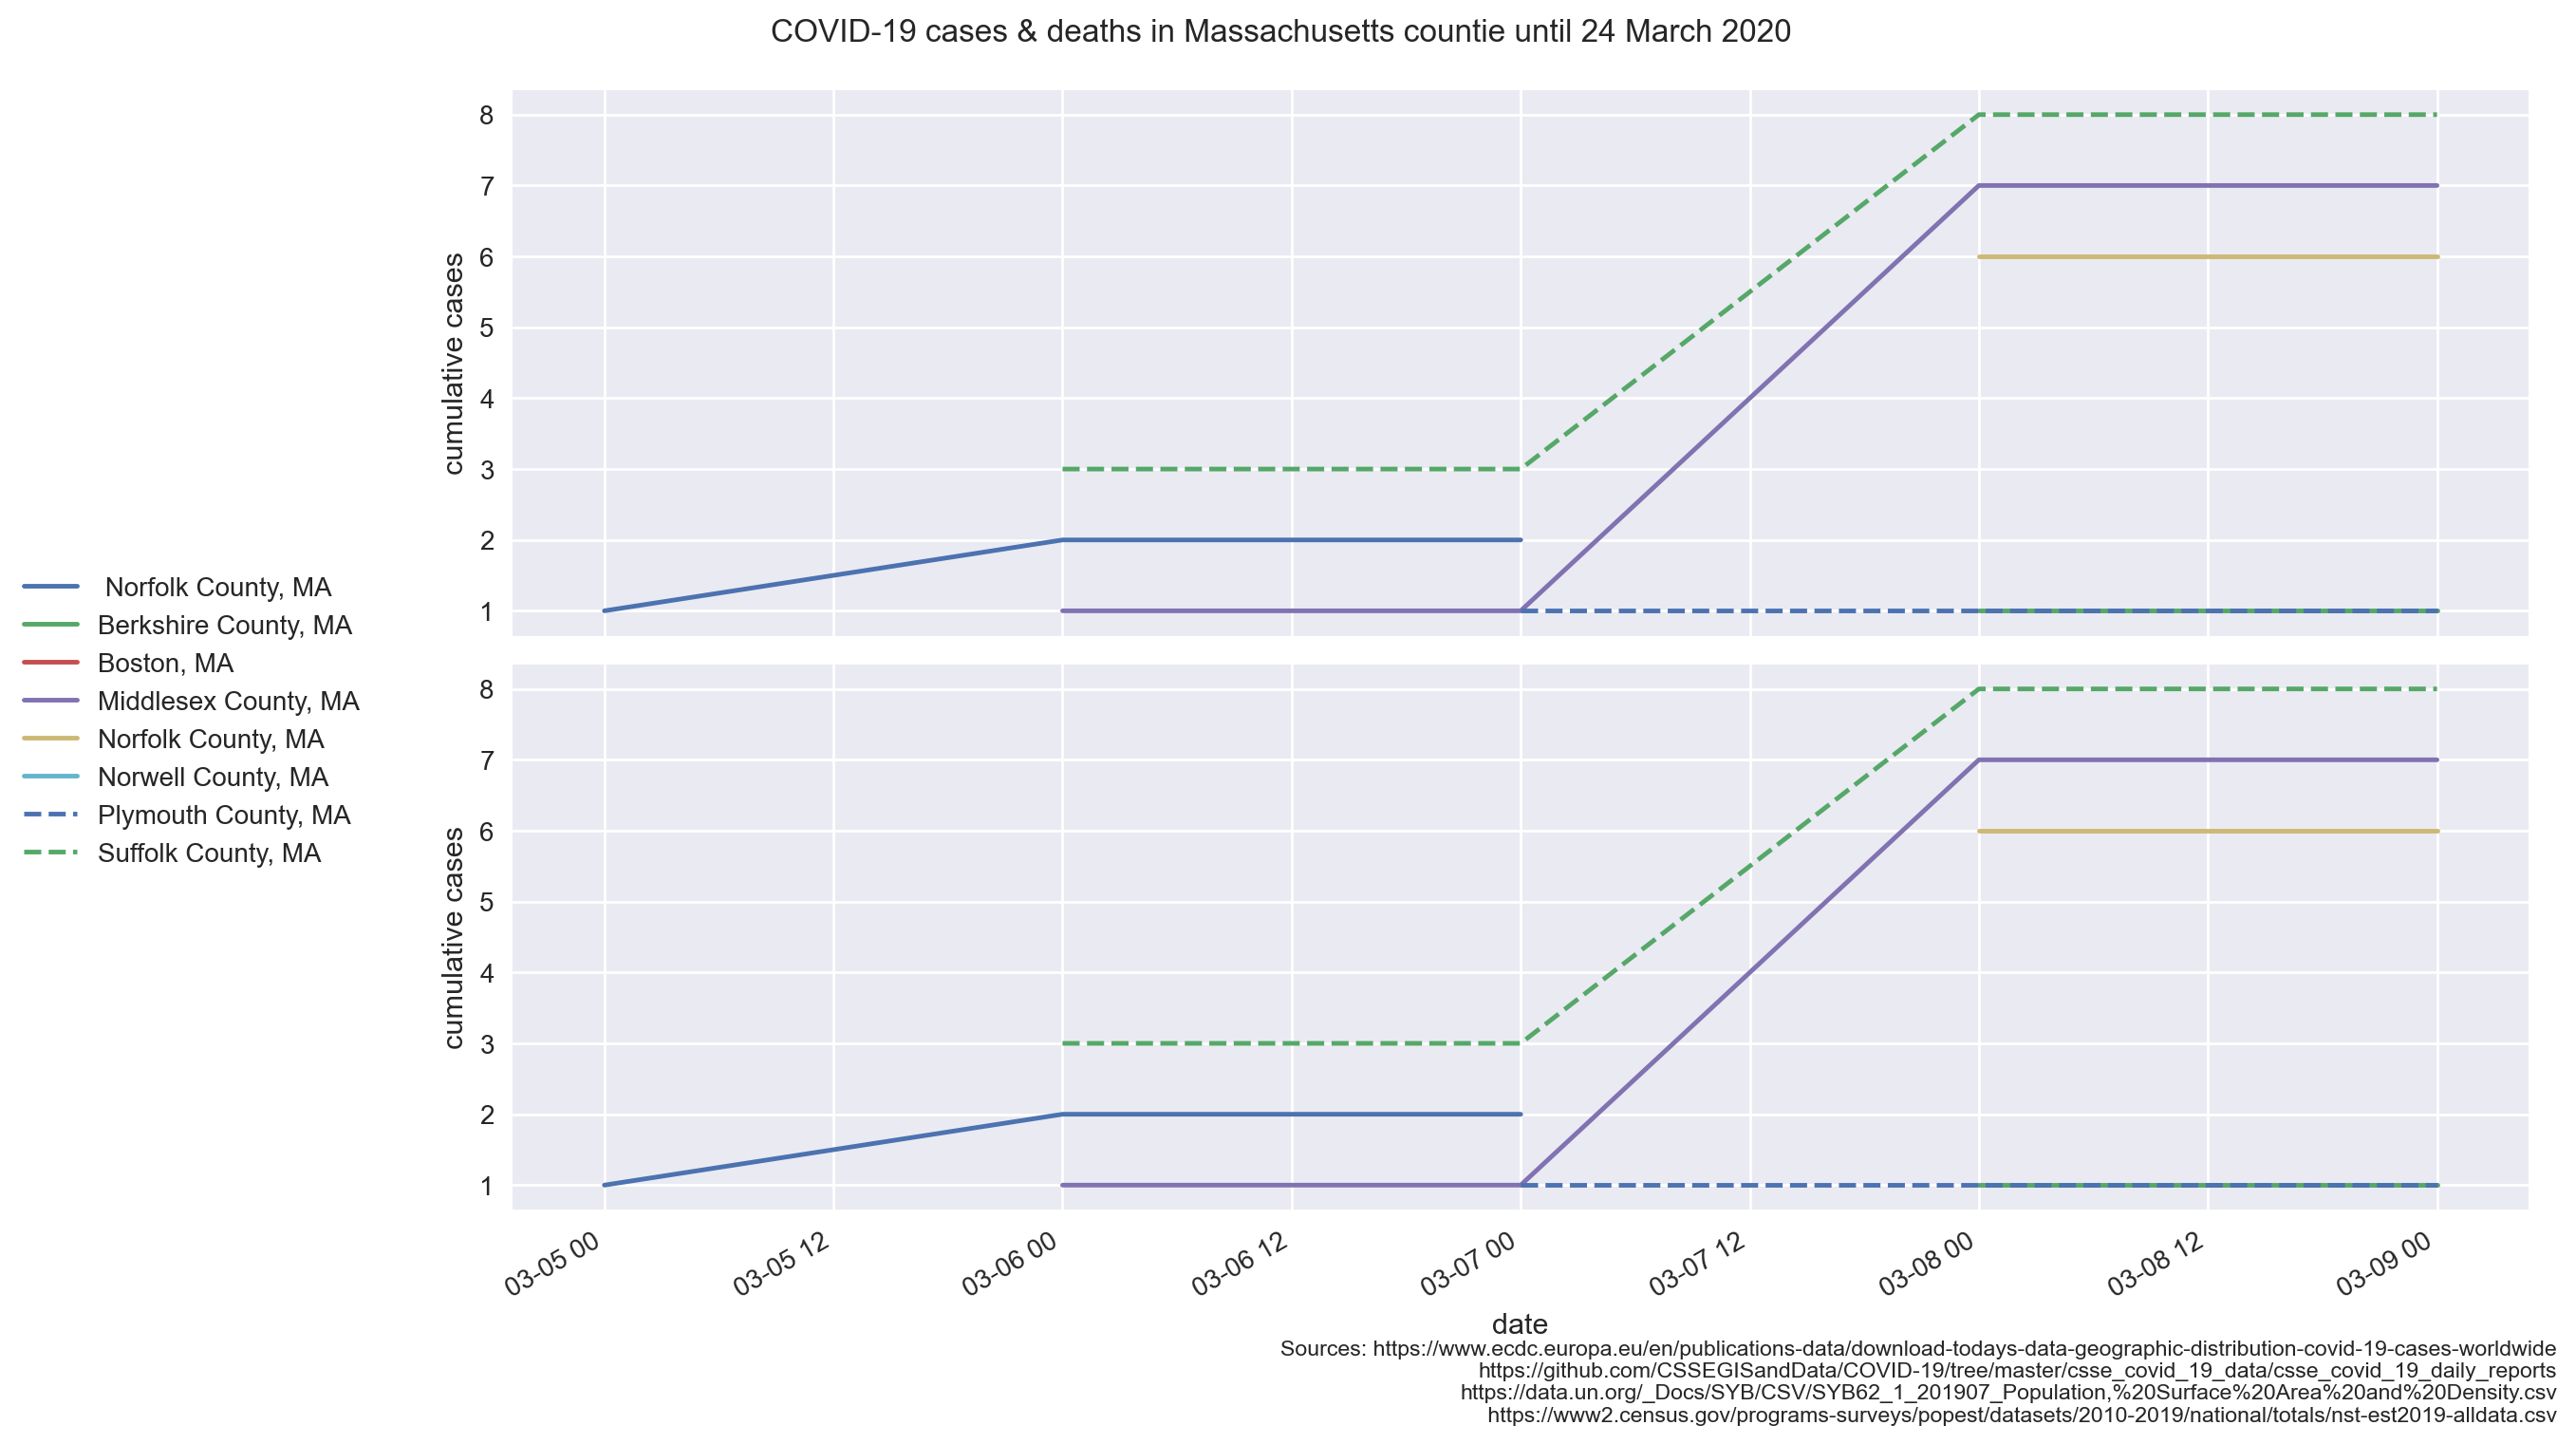

In [65]:
e_list = sorted(list(filter(lambda s: s[-4:] == ', MA' and s != 'Unknown Location, MA', jhu_sbc['US'])))
fig, ax = plt.subplots(2, 1, **{'figsize': (0.7 * 19.2 , 0.7 * 10.8), 'dpi': 200})
x_start = date(2020, 3, 5)
plot(e_list, 'date', 'cum_cases', data=jhu_states, norm=False, ax=ax[0], y_scale='linear', x_start=x_start, legend=False)
plot(e_list, 'date', 'cum_cases', data=jhu_states, norm=False, ax=ax[1], y_scale='linear', x_start=x_start, legend=False, pop_nums=us_pop_nums)
#plot(e_list, 'date', 'cum_deaths', data=jhu_states, norm=False, ax=ax[0, 1], y_scale='linear', x_start=None, legend=False)
#plot(e_list, 'date', 'cum_deaths', data=jhu_states, norm=False, ax=ax[1, 1], y_scale='linear', x_start=None, legend=False, pop_nums=us_pop_nums)
fig.autofmt_xdate()

fig.suptitle("COVID-19 cases & deaths in Massachusetts countie until {}".format(jhu_date.strftime('%d %B %Y')))
handles, labels = ax[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='center left')
fig.text(1, 0, "Sources: " + ecdc_src + '\n' + jhu_daily_src + '\n' + un_pop_num_src + '\n' + us_pop_num_src,
         horizontalalignment='right', verticalalignment='bottom', fontsize='small')

fig.tight_layout(rect=(0.16, 0.04, 1.0, 0.95))